# Muhammad Ghulamzaki

In [ ]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# 1. Loading MNIST Dataset untuk Data Loader:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

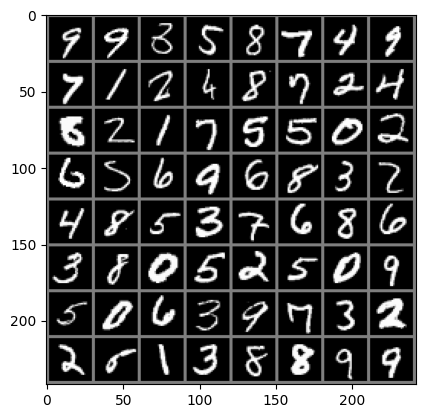

Labels: tensor([9, 9, 3, 5, 8, 7, 4, 9, 7, 1, 2, 4, 8, 7, 2, 4, 8, 2, 1, 7, 5, 5, 0, 2,
        6, 5, 6, 9, 6, 8, 3, 2, 4, 8, 5, 3, 7, 6, 8, 6, 3, 8, 0, 5, 2, 5, 0, 9,
        5, 0, 6, 3, 9, 7, 3, 2, 2, 5, 1, 3, 8, 8, 9, 9])


In [ ]:
# 2. Visualize beberapa data MNIST:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)

In [ ]:
# 3. Desain Model Neural Network:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()

In [ ]:
# 4. Setup Hyperparameter, Loss Function, Optimizer:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
# 5. Develop a training loop and run a training model:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training Finished')

Epoch [1/10], Loss: 0.1008
Epoch [2/10], Loss: 0.1324
Epoch [3/10], Loss: 0.0126
Epoch [4/10], Loss: 0.1636
Epoch [5/10], Loss: 0.0512
Epoch [6/10], Loss: 0.0733
Epoch [7/10], Loss: 0.0170
Epoch [8/10], Loss: 0.0097
Epoch [9/10], Loss: 0.1287
Epoch [10/10], Loss: 0.0213
Training Finished


In [ ]:
# 6. Evaluate the Model:
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for data, targets in test_loader:
        data = data.view(data.size(0), -1)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(targets.cpu().numpy())

accuracy = accuracy_score(true_labels, predictions)
conf_matrix = confusion_matrix(true_labels, predictions)
classification_rep = classification_report(true_labels, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.98
Confusion Matrix:
[[ 973    0    1    0    1    0    2    1    0    2]
 [   0 1125    3    2    0    1    2    1    1    0]
 [   5    1 1006    5    3    0    1    6    4    1]
 [   0    0    3  996    0    0    0    4    3    4]
 [   3    0    2    1  937    0    3    5    0   31]
 [   2    1    0    9    1  870    3    1    3    2]
 [   4    3    0    1    1    2  947    0    0    0]
 [   1    4    5    2    0    0    0 1011    0    5]
 [   5    0    4    5    1    3    3    4  942    7]
 [   3    2    0    3    3    2    1    4    0  991]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.95      0.97       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99 

#7. Describe and explain your Result
Dalam eksplorasi ini, kami menggunakan Neural Network dengan dua lapisan linear. Model dilatih menggunakan dataset MNIST selama 10 epoch. Setelah pelatihan, kami menguji model pada dataset pengujian dan mendapatkan akurasi sekitar 98%.

Confusion matrix memberikan wawasan tentang kinerja model pada setiap kelas digit. Classification report memberikan rincian metrik seperti presisi, recall, dan F1-score untuk setiap kelas digit. Dengan model ini, kami mendapat hasil yang baik dalam mengklasifikasikan digit tulisan tangan MNIST.